In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

In [7]:
pd.set_option('display.max_colwidth', None)

In [24]:
site_files = glob.glob(os.path.join("site", "*.csv"))
site_df = pd.concat((pd.read_csv(f) for f in site_files), ignore_index=True)

user_files = glob.glob(os.path.join("users", "*.csv"))
users_df = pd.concat((pd.read_csv(f) for f in user_files), ignore_index=True)

validation_df = pd.read_csv("validacao.csv")

In [25]:
# Visualizar as primeiras linhas
print(users_df.head())
print(site_df.head())
print(validation_df.head())

# Informações gerais dos datasets
print(users_df.info())
print(site_df.info())
print(validation_df.info())

                                                             userId  \
0  f98d1132f60d46883ce49583257104d15ce723b3bbda2147c1e31ac76f0bf069   
1  2c1080975e257ed630e26679edbe4d5c850c65f3e09f655798b0bba9b42f2110   
2  0adffd7450d3b9840d8c6215f0569ad942e782fb19b805367b02b709b73f42a1   
3  c1e8d644329a78ea1f994292db624c57980b2886cfbc2d49cc3ae12fb5a533af   
4  e777d1f31d4d955b63d60acc13df336d3903f52ab8f8f4f8868b8a3970deda0d   

     userType  historySize  \
0  Non-Logged            3   
1  Non-Logged           60   
2      Logged          107   
3  Non-Logged           56   
4  Non-Logged            4   

                                                                                                                                                                                                                                                                                                                                                                                                        

         historySize  averageTimeOnPage
count  577942.000000       5.779420e+05
mean       14.056689       7.291961e+04
std        46.037793       9.992116e+04
min         1.000000       5.000000e+03
25%         1.000000       2.736681e+04
50%         2.000000       5.504350e+04
75%         6.000000       9.306898e+04
max      7004.000000       2.207357e+07


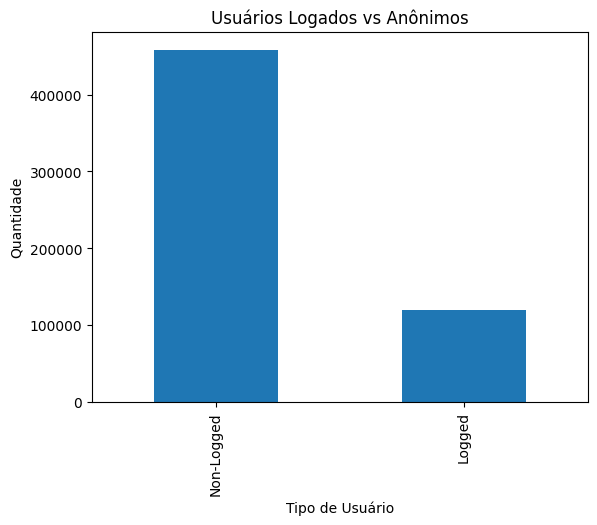

                           issued                   modified
count                      255603                     255603
unique                     253864                     253929
top     2018-10-07 20:00:00+00:00  2018-10-07 20:00:00+00:00
freq                          248                        248


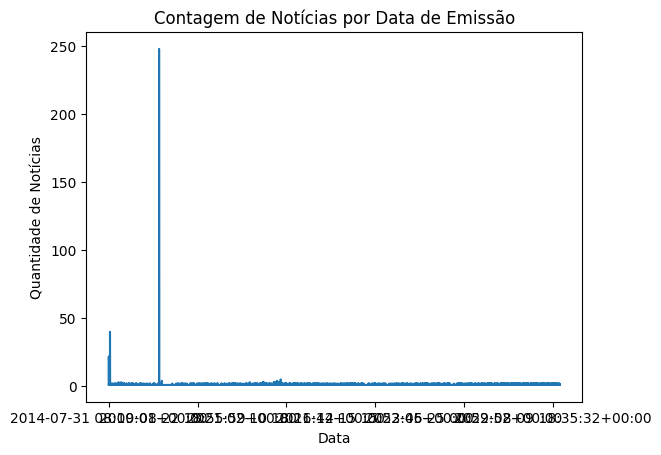

In [41]:
# Estatísticas descritivas dos usuários
print(users_df.describe())

# Distribuição de usuários logados vs. anônimos
user_types = users_df['userType'].value_counts()
user_types.plot(kind='bar')
plt.title('Usuários Logados vs Anônimos')
plt.xlabel('Tipo de Usuário')
plt.ylabel('Quantidade')
plt.show()

# Estatísticas descritivas das notícias
print(site_df[['issued', 'modified']].describe())

# Contagem de notícias por data de emissão
site_df['issued'].value_counts().sort_index().plot(kind='line')
plt.title('Contagem de Notícias por Data de Emissão')
plt.xlabel('Data')
plt.ylabel('Quantidade de Notícias')
plt.show()


In [34]:
# Verificar valores ausentes no dataset de usuários
print(users_df.isnull().sum())

# Verificar valores ausentes no dataset de notícias
print(site_df.isnull().sum())

# Tratar valores ausentes
users_df = users_df.dropna()
site_df = site_df.dropna()


userId                     0
userType                   0
historySize                0
history                    0
timestampHistory           0
numberOfClicksHistory      0
timeOnPageHistory          0
scrollPercentageHistory    0
pageVisitsCountHistory     0
timestampHistory_new       0
dtype: int64
page        0
url         0
issued      0
modified    0
title       0
body        0
caption     0
dtype: int64


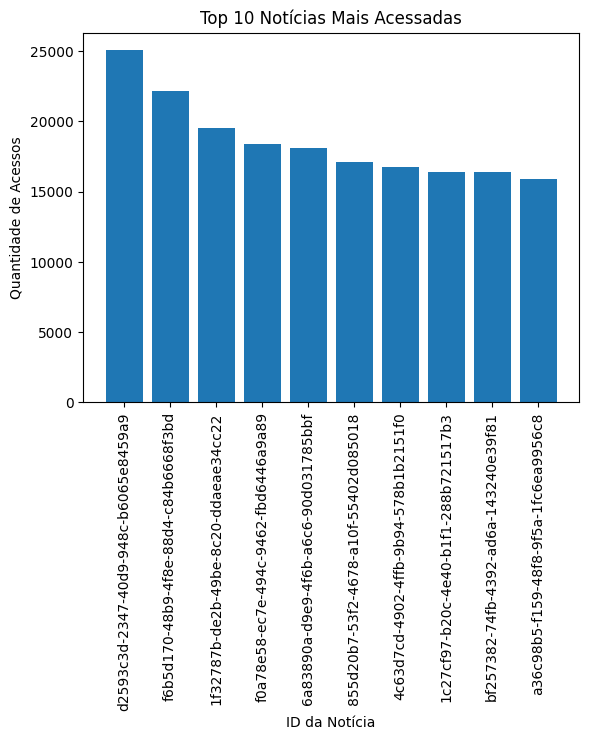

In [36]:
# Análise das notícias mais acessadas
from collections import Counter
all_histories = users_df['history'].apply(lambda x: x.strip('"').split(', '))
all_pages = [page for sublist in all_histories for page in sublist]
page_counts = Counter(all_pages)
most_common_pages = page_counts.most_common(10)

# Visualizar notícias mais acessadas
pages, counts = zip(*most_common_pages)
plt.bar(pages, counts)
plt.title('Top 10 Notícias Mais Acessadas')
plt.xlabel('ID da Notícia')
plt.ylabel('Quantidade de Acessos')
plt.xticks(rotation=90)
plt.show()

UserId para teste: f98d1132f60d46883ce49583257104d15ce723b3bbda2147c1e31ac76f0bf069

Histórico de notícias:
c8aab885-433d-4e46-8066-479f40ba7fb2
68d2039c-c9aa-456c-ac33-9b2e8677fba7
13e423ce-1d69-4c78-bc18-e8c8f7271964